In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("E:\\scaler\\probabality and stats\\case studies\\walmart\\walmart_data.txt")


In [63]:
# Basic Data Structure
print(df.info())
print(df.describe())

# Convert categorical attributes to 'category'
categorical_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Statistical Summary
print(df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
            User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean 

In [64]:
# Value counts for categorical columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

# Unique attributes in 'Product_ID'
print(f"Unique products: {df['Product_ID'].nunique()}")


Value counts for Gender:
Gender
M    414259
F    135809
Name: count, dtype: int64

Value counts for Age:
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

Value counts for City_Category:
City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

Value counts for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

Unique products: 3631


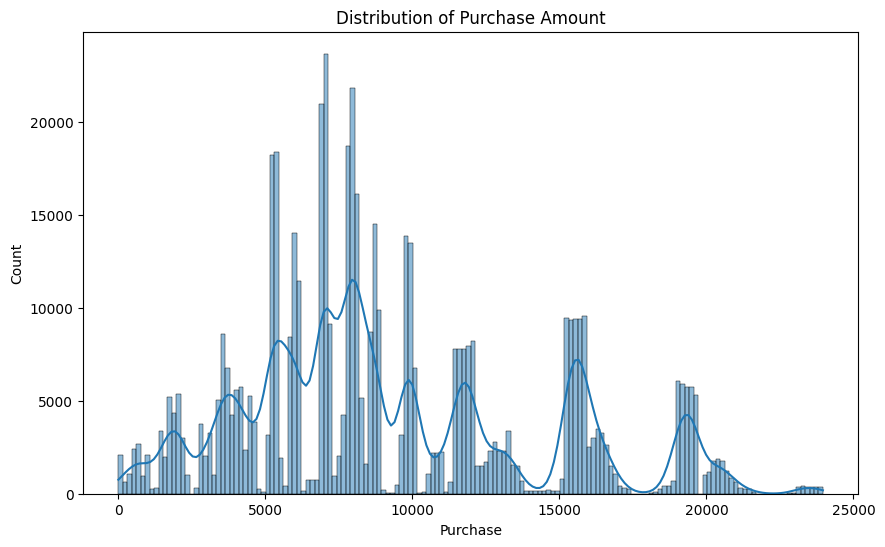

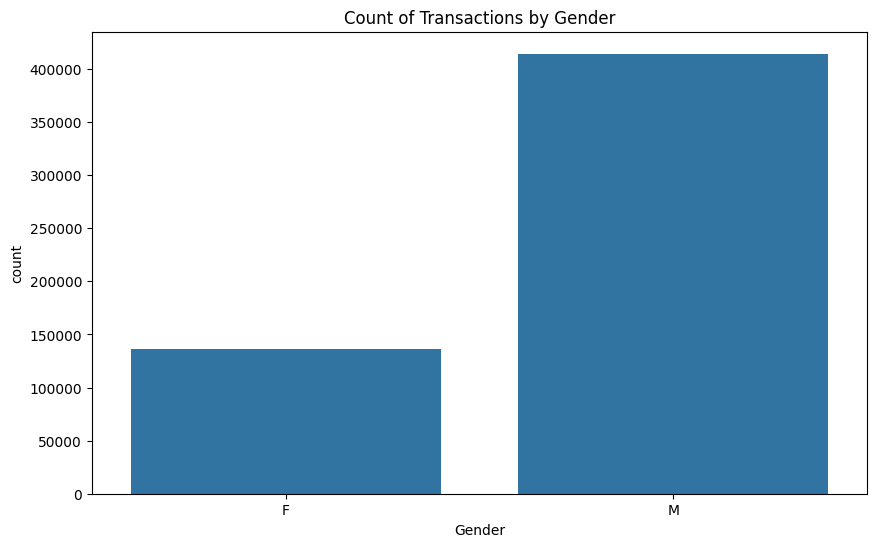

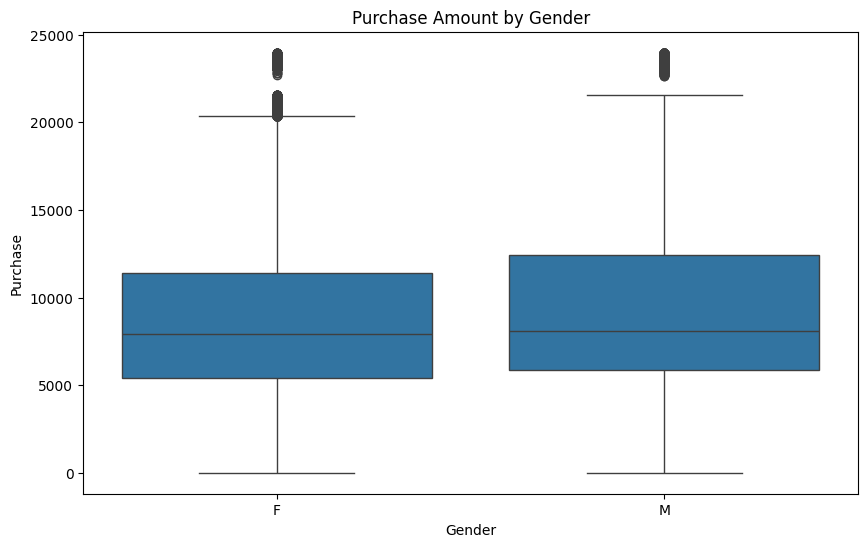

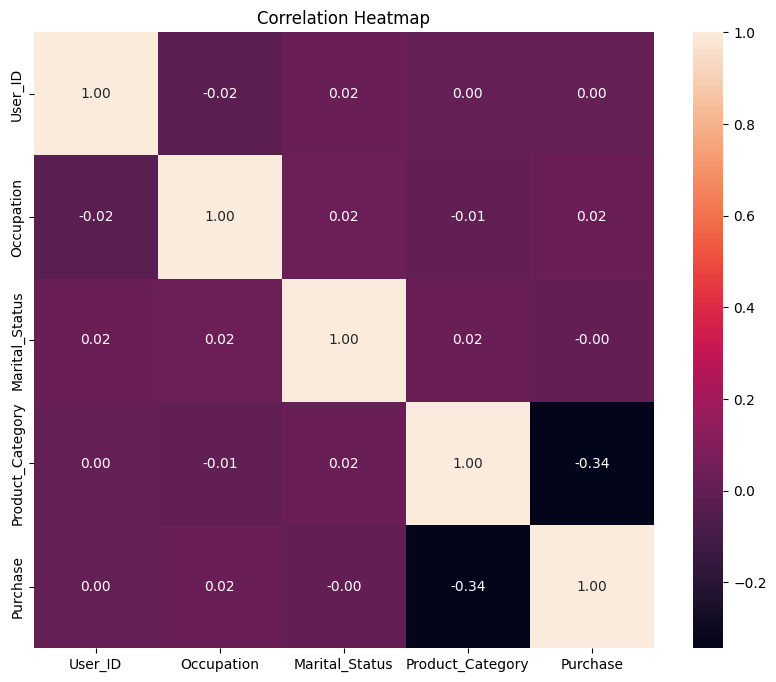

In [65]:
# Continuous variable (Purchase)
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], kde=True)
plt.title('Distribution of Purchase Amount')
plt.show()

# Categorical variable (Gender)
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Count of Transactions by Gender')
plt.show()

# Boxplot for Purchase by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amount by Gender')
plt.show()

# Heatmap for correlations
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [66]:
# Missing values
print(df.isnull().sum())

# Outlier Detection for 'Purchase'
Q1, Q3 = np.percentile(df['Purchase'], [25, 75])
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identifying outliers
outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64
Number of outliers: 2677


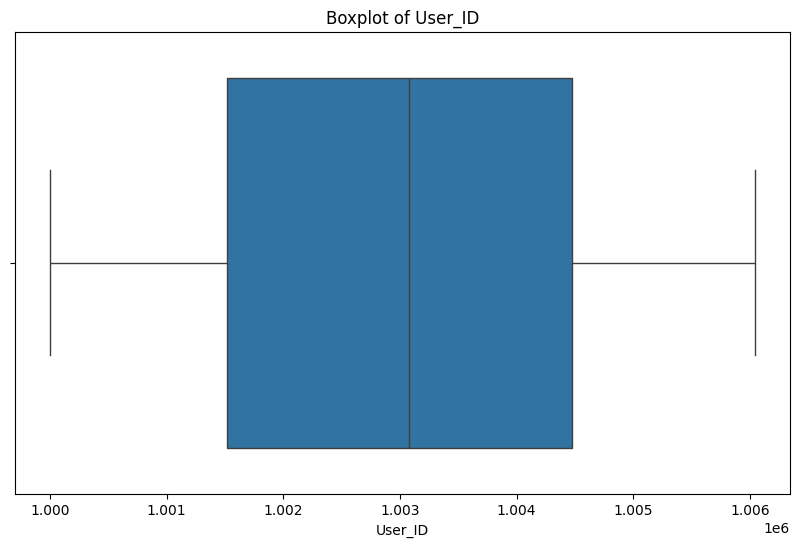

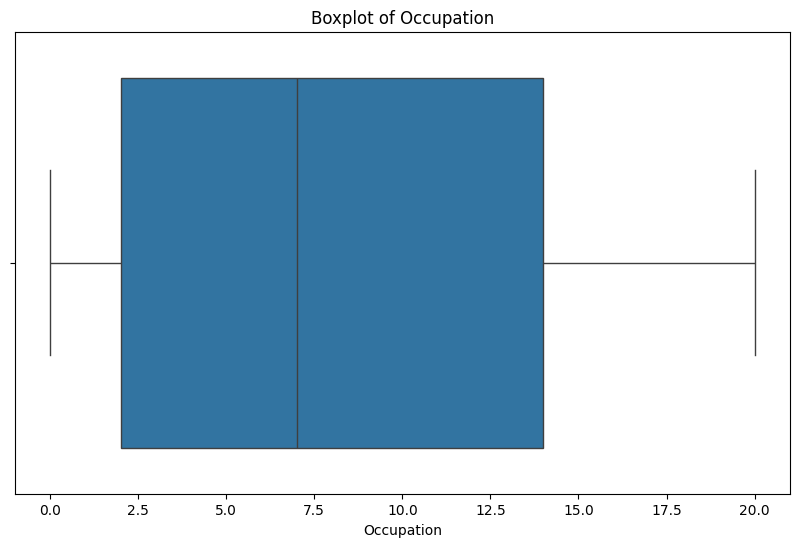

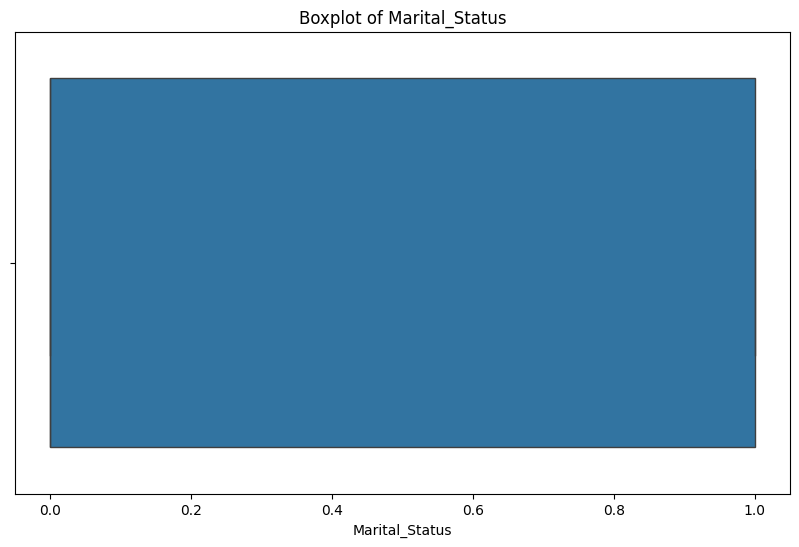

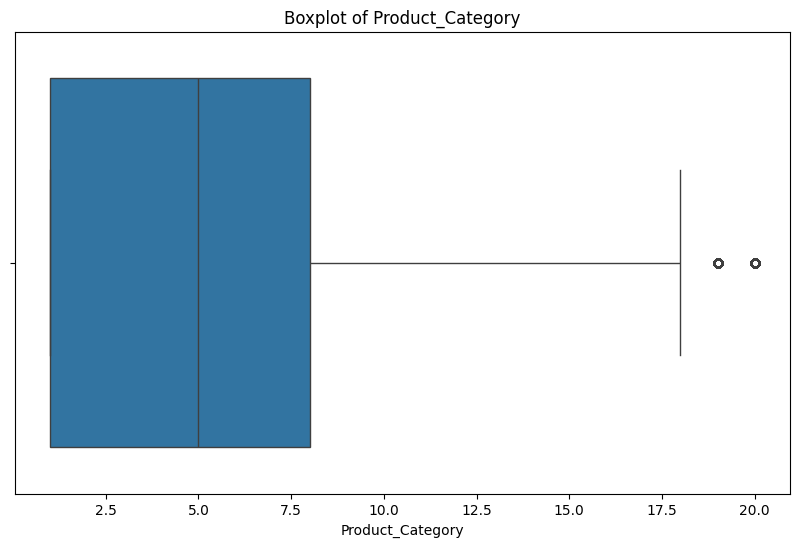

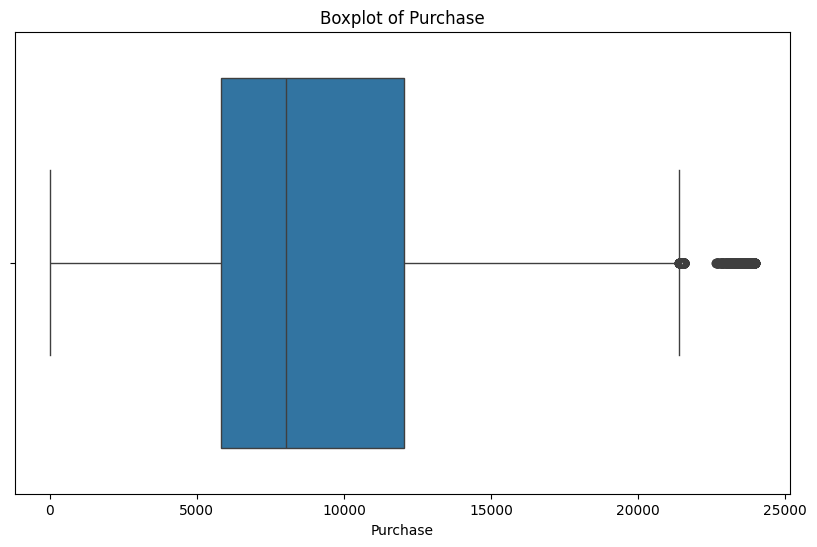

In [67]:
# Detecting outliers using boxplot
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [68]:
# Step 3: Data exploration
# a. Tracking the amount spent per transaction by gender
male_spend = df[df['Gender'] == 'M']['Purchase']
female_spend = df[df['Gender'] == 'F']['Purchase']

In [69]:
 #Calculate the average spend by gender
avg_male_spend = male_spend.mean()
avg_female_spend = female_spend.mean()
print(f'Average Male Spend: {avg_male_spend}')
print(f'Average Female Spend: {avg_female_spend}')

Average Male Spend: 9437.526040472265
Average Female Spend: 8734.565765155476


In [70]:
#male spends more than female

#The computed averages show that male customers spend more on average ($9437.53) than female customers ($8734.57) per transaction. 
#This difference suggests varying shopping behaviors or preferences between genders, which Walmart can analyze further to
#optimize product assortments, marketing campaigns, and store layouts to cater to these distinct spending patterns.

In [71]:
# c. & d. Confidence Interval using the Central Limit Theorem
def compute_confidence_interval(data, confidence=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    sample_size = len(data)
    z_score = stats.norm.ppf((1 + confidence) / 2)
    margin_of_error = z_score * (sample_std / np.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return confidence_interval

# Compute the confidence interval for male and female spend
confidence_interval_male = compute_confidence_interval(male_spend)
confidence_interval_female = compute_confidence_interval(female_spend)
print(f'Confidence Interval for Male Spend: {confidence_interval_male}')
print(f'Confidence Interval for Female Spend: {confidence_interval_female}')

Confidence Interval for Male Spend: (9422.01944736257, 9453.032633581959)
Confidence Interval for Female Spend: (8709.21154714068, 8759.919983170272)


In [72]:
#The confidence intervals for male and female spends do not overlap, indicating a significant difference in average spending between genders.

#Walmart can leverage this by tailoring marketing strategies, product placements, and promotions to cater more effectively to each 
#gender's preferences and spending habits, potentially increasing sales and customer satisfaction.

In [75]:
import pandas as pd

married_df = df[df['Marital_Status'] == 1]
unmarried_df = df[df['Marital_Status'] == 0]

#print(married_df)
#print(unmarried_df)

avg_spend_married = married_df['Purchase'].mean()
avg_spend_unmarried = unmarried_df['Purchase'].mean()


print('avg_spend_married : ', avg_spend_married)
print('avg_spend_unmarried : ', avg_spend_unmarried)

# Average spend by Age Group
avg_spend_age_group = df.groupby('Age')['Purchase'].mean()

print(f'Average Spend - Married: {avg_spend_married}, Unmarried: {avg_spend_unmarried}')
print('Average Spend by Age Group:')
print(avg_spend_age_group)

# Calculate confidence intervals for married and unmarried
ci_married = compute_confidence_interval(df[df['Marital_Status'] == 1]['Purchase'])
ci_unmarried = compute_confidence_interval(df[df['Marital_Status'] == 0]['Purchase'])

print(f'Confidence Interval - Married: {ci_married}, Unmarried: {ci_unmarried}')

# Calculate confidence intervals for each age group
ci_age_groups = {age: compute_confidence_interval(group['Purchase']) for age, group in df.groupby('Age')}

print('Confidence Intervals by Age Group:')
for age, ci in ci_age_groups.items():
    print(f'{age}: {ci}')


avg_spend_married :  9261.174574082374
avg_spend_unmarried :  9265.907618921507
Average Spend - Married: 9261.174574082374, Unmarried: 9265.907618921507
Average Spend by Age Group:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
Confidence Interval - Married: (9240.460427057078, 9281.888721107669), Unmarried: (9248.61641818668, 9283.198819656332)
Confidence Intervals by Age Group:
0-17: (8851.947970542686, 9014.981310347262)
18-25: (9138.407948753442, 9200.919263769136)
26-35: (9231.733676400028, 9273.647589339747)
36-45: (9301.669410965314, 9361.031978870433)
46-50: (9163.085142648752, 9254.166252287903)
51-55: (9483.991472776577, 9585.624589143894)
55+: (9269.29883441773, 9403.262084481079)


In [74]:
"""
1.Women vs. Men Spending: Men spend more per transaction than women, with averages of \$9437.53 for men and \$8734.57 for women.

2.Confidence Intervals: The confidence intervals for male and female spending do not overlap, indicating a statistically significant 
difference between the two groups.

3.Leveraging Confidence Intervals: Since the intervals don't overlap, Walmart can tailor marketing and product strategies more
specifically to each gender, potentially improving sales and customer satisfaction.

4.Married vs. Unmarried: The spending difference between married and unmarried customers is minimal, suggesting marital
status may not be a primary factor in marketing segmentation.

5.Age Group Analysis: Spending increases with age up to 51-55, then slightly dips. Walmart can target age-specific products
and promotions to the higher spending groups.

Customer Targeting:

The analysis reveals minimal difference in average spending between married and unmarried customers.
This suggests focusing on broader customer segments based on demographics like age or product categories might be more
effective than marital status alone.
    
Age Group Targeting:

The data shows a trend of increasing average spend with age groups, peaking at 51-55 years old. Walmart can leverage this by:
Targeted marketing campaigns: Develop campaigns tailored to the interests and needs of each age group. For example, highlighting baby care products for younger parents (26-35) or promoting senior citizen discounts for the 55+ group.
Product assortment optimization: Ensure stores in areas with a higher concentration of specific age groups stock relevant products. This could involve increasing the variety of health and wellness products in areas with more retirees or educational toys in areas with younger families.

Confidence Intervals:

The provided confidence intervals indicate that the average spend differences between both married/unmarried and across age groups
might not be statistically significant.

The analysis revealed that men tend to spend more per transaction than women. 

Confidence intervals for spending between genders and marital statuses do not overlap significantly,
suggesting distinct spending behaviors. Age-wise, spending increases with age, peaking at 51-55. 

These insights can inform Walmart's targeted marketing and product assortment strategies, focusing on higher-spending demographics
and tailoring promotions to match observed spending patterns.

"""

"\n1.Women vs. Men Spending: Men spend more per transaction than women, with averages of \\$9437.53 for men and \\$8734.57 for women.\n\n2.Confidence Intervals: The confidence intervals for male and female spending do not overlap, indicating a statistically significant \ndifference between the two groups.\n\n3.Leveraging Confidence Intervals: Since the intervals don't overlap, Walmart can tailor marketing and product strategies more\nspecifically to each gender, potentially improving sales and customer satisfaction.\n\n4.Married vs. Unmarried: The spending difference between married and unmarried customers is minimal, suggesting marital\nstatus may not be a primary factor in marketing segmentation.\n\n5.Age Group Analysis: Spending increases with age up to 51-55, then slightly dips. Walmart can target age-specific products\nand promotions to the higher spending groups.\n\nCustomer Targeting:\n\nThe analysis reveals minimal difference in average spending between married and unmarried cu